In [37]:
#Grupo 1
import requests
import json

def getHourlyWeatherForescast(lat,lon):

     """Accesses open-meteo.com and retrieves, for location Lat, Lon the current weather and the hourly forecast for :
        temperature_2m
        relativehumidity_2m
        precipitation
        soil_moisture_3_9cm
        soil_moisture_9_27cm
        vapor_pressure_deficit
        et0_fao_evapotranspiration   
     Args:
         lat (float): Latitude in deimal degrees
         lon (float): Longitude in decimal degrees
     Returns:
         dictionary: A dictionary with retrieved data from open-meteo
     """

 # set URL of API

     original_url = 'https://api.open-meteo.com/' 

 # convert the inputs of latitude and longitude into strings (necessarz for concatenation in next step)

     lat = str(lat)
     lon = str(lon)

 # concatenate the URL for all data we want to retrieve

     url = original_url + 'v1/forecast?' + 'latitude=' + lat + '&longitude=' + lon + '&current_weather=true&hourly=temperature_2m,relativehumidity_2m,precipitation,soil_moisture_3_9cm,soil_moisture_9_27cm,vapor_pressure_deficit,et0_fao_evapotranspiration'

 # request the data from the API

     resp = requests.get(url)

 # use the builtin JSON decoder from requests library to create dictionary from the response (JSON data)

     Output1 = resp.json()

 # return the output
     return Output1


print(getHourlyWeatherForescast(52.55, 13.45))

{'latitude': 52.54, 'longitude': 13.459999, 'generationtime_ms': 1.3060569763183594, 'utc_offset_seconds': 0, 'timezone': 'GMT', 'timezone_abbreviation': 'GMT', 'elevation': 47.0, 'current_weather': {'temperature': 0.3, 'windspeed': 3.9, 'winddirection': 56.0, 'weathercode': 3, 'time': '2023-01-24T18:00'}, 'hourly_units': {'time': 'iso8601', 'temperature_2m': '°C', 'relativehumidity_2m': '%', 'precipitation': 'mm', 'soil_moisture_3_9cm': 'm³/m³', 'soil_moisture_9_27cm': 'm³/m³', 'vapor_pressure_deficit': 'kPa', 'et0_fao_evapotranspiration': 'mm'}, 'hourly': {'time': ['2023-01-24T00:00', '2023-01-24T01:00', '2023-01-24T02:00', '2023-01-24T03:00', '2023-01-24T04:00', '2023-01-24T05:00', '2023-01-24T06:00', '2023-01-24T07:00', '2023-01-24T08:00', '2023-01-24T09:00', '2023-01-24T10:00', '2023-01-24T11:00', '2023-01-24T12:00', '2023-01-24T13:00', '2023-01-24T14:00', '2023-01-24T15:00', '2023-01-24T16:00', '2023-01-24T17:00', '2023-01-24T18:00', '2023-01-24T19:00', '2023-01-24T20:00', '2023-

In [38]:
#Grupo 2

# Group2 is responsible to provide a function with the calculation of Soil Tension equation (van Genuchten, 1980) 
# The function should be independent of external modules (e.g. endpoint should not need to import material.py module).
# material.py provides the pF equation as van Genuchten (Further reading of van Genuchten equation : https://bit.ly/3V2RPT6 )

import math

#dictionary of values from api
Output1Group1 = {"latitude":37.64,"longitude":-7.6600003,"generationtime_ms":1.3810396194458008,"utc_offset_seconds":0,"timezone":"GMT","timezone_abbreviation":"GMT","elevation":53.0,
       "current_weather":{"temperature":14.7,"windspeed":3.3,"winddirection":193.0,"weathercode":1,"time":"2022-12-15T11:00"},
       "hourly_units":{"time":"iso8601","temperature_2m":"°C","relativehumidity_2m":"%","precipitation":"mm","soil_moisture_9_27cm":"m³/m³","vapor_pressure_deficit":"kPa"},
       "hourly":{
           "time":["2022-12-15T00:00","2022-12-15T01:00","2022-12-15T02:00","2022-12-15T03:00","2022-12-15T04:00","2022-12-15T05:00","2022-12-15T06:00","2022-12-15T07:00","2022-12-15T08:00","2022-12-15T09:00","2022-12-15T10:00","2022-12-15T11:00","2022-12-15T12:00","2022-12-15T13:00","2022-12-15T14:00","2022-12-15T15:00","2022-12-15T16:00","2022-12-15T17:00","2022-12-15T18:00","2022-12-15T19:00","2022-12-15T20:00","2022-12-15T21:00","2022-12-15T22:00","2022-12-15T23:00","2022-12-16T00:00","2022-12-16T01:00","2022-12-16T02:00","2022-12-16T03:00","2022-12-16T04:00","2022-12-16T05:00","2022-12-16T06:00","2022-12-16T07:00","2022-12-16T08:00","2022-12-16T09:00","2022-12-16T10:00","2022-12-16T11:00","2022-12-16T12:00","2022-12-16T13:00","2022-12-16T14:00","2022-12-16T15:00","2022-12-16T16:00","2022-12-16T17:00","2022-12-16T18:00","2022-12-16T19:00","2022-12-16T20:00","2022-12-16T21:00","2022-12-16T22:00","2022-12-16T23:00","2022-12-17T00:00","2022-12-17T01:00","2022-12-17T02:00","2022-12-17T03:00","2022-12-17T04:00","2022-12-17T05:00","2022-12-17T06:00","2022-12-17T07:00","2022-12-17T08:00","2022-12-17T09:00","2022-12-17T10:00","2022-12-17T11:00","2022-12-17T12:00","2022-12-17T13:00","2022-12-17T14:00","2022-12-17T15:00","2022-12-17T16:00","2022-12-17T17:00","2022-12-17T18:00","2022-12-17T19:00","2022-12-17T20:00","2022-12-17T21:00","2022-12-17T22:00","2022-12-17T23:00","2022-12-18T00:00","2022-12-18T01:00","2022-12-18T02:00","2022-12-18T03:00","2022-12-18T04:00","2022-12-18T05:00","2022-12-18T06:00","2022-12-18T07:00","2022-12-18T08:00","2022-12-18T09:00","2022-12-18T10:00","2022-12-18T11:00","2022-12-18T12:00","2022-12-18T13:00","2022-12-18T14:00","2022-12-18T15:00","2022-12-18T16:00","2022-12-18T17:00","2022-12-18T18:00","2022-12-18T19:00","2022-12-18T20:00","2022-12-18T21:00","2022-12-18T22:00","2022-12-18T23:00","2022-12-19T00:00","2022-12-19T01:00","2022-12-19T02:00","2022-12-19T03:00","2022-12-19T04:00","2022-12-19T05:00","2022-12-19T06:00","2022-12-19T07:00","2022-12-19T08:00","2022-12-19T09:00","2022-12-19T10:00","2022-12-19T11:00","2022-12-19T12:00","2022-12-19T13:00","2022-12-19T14:00","2022-12-19T15:00","2022-12-19T16:00","2022-12-19T17:00","2022-12-19T18:00","2022-12-19T19:00","2022-12-19T20:00","2022-12-19T21:00","2022-12-19T22:00","2022-12-19T23:00","2022-12-20T00:00","2022-12-20T01:00","2022-12-20T02:00","2022-12-20T03:00","2022-12-20T04:00","2022-12-20T05:00","2022-12-20T06:00","2022-12-20T07:00","2022-12-20T08:00","2022-12-20T09:00","2022-12-20T10:00","2022-12-20T11:00","2022-12-20T12:00","2022-12-20T13:00","2022-12-20T14:00","2022-12-20T15:00","2022-12-20T16:00","2022-12-20T17:00","2022-12-20T18:00","2022-12-20T19:00","2022-12-20T20:00","2022-12-20T21:00","2022-12-20T22:00","2022-12-20T23:00","2022-12-21T00:00","2022-12-21T01:00","2022-12-21T02:00","2022-12-21T03:00","2022-12-21T04:00","2022-12-21T05:00","2022-12-21T06:00","2022-12-21T07:00","2022-12-21T08:00","2022-12-21T09:00","2022-12-21T10:00","2022-12-21T11:00","2022-12-21T12:00","2022-12-21T13:00","2022-12-21T14:00","2022-12-21T15:00","2022-12-21T16:00","2022-12-21T17:00","2022-12-21T18:00","2022-12-21T19:00","2022-12-21T20:00","2022-12-21T21:00","2022-12-21T22:00","2022-12-21T23:00"],
           "temperature_2m":[13.3,12.8,12.4,12.6,12.3,12.0,9.7,10.2,9.6,10.6,12.5,14.7,16.6,17.2,17.5,17.6,17.0,16.0,14.4,13.1,12.0,11.3,11.0,10.6,10.3,10.0,9.7,9.5,9.9,10.3,10.5,10.7,10.9,11.1,12.1,15.7,18.1,18.7,18.9,18.8,18.3,17.2,15.4,13.1,12.2,11.8,11.4,11.1,10.5,10.2,9.5,9.0,8.6,8.3,8.3,8.4,8.5,9.4,11.5,14.0,15.9,17.0,17.8,18.1,17.6,16.3,15.0,13.8,12.8,12.2,12.2,11.9,11.5,11.5,11.6,11.8,12.1,12.2,12.2,12.4,12.3,12.6,12.9,13.6,15.1,16.5,17.4,17.7,17.5,16.3,14.7,13.4,13.1,12.7,12.5,12.7,12.9,12.9,12.9,12.9,12.8,12.8,12.9,12.9,13.1,13.8,15.2,17.0,18.9,19.3,19.3,19.0,18.4,17.5,16.6,16.4,16.4,16.4,16.4,16.4,16.4,16.3,16.2,16.2,16.2,16.3,16.3,15.3,15.4,15.7,15.9,16.2,16.5,16.6,16.6,16.4,16.3,16.1,15.8,15.5,15.3,14.9,14.6,14.3,13.8,13.4,12.9,12.2,11.7,11.1,10.5,10.1,9.8,10.0,11.0,12.5,14.1,14.7,15.0,14.9,14.1,12.8,11.2,10.2,9.2,8.1,7.4,6.9],
           "relativehumidity_2m":[89,90,93,93,94,92,97,96,97,96,90,80,61,53,49,47,51,53,59,66,84,89,91,92,94,96,97,99,100,100,100,99,98,96,90,77,59,54,51,50,52,59,70,87,92,93,93,94,96,97,98,98,99,99,99,98,98,98,90,83,76,71,66,64,65,73,86,93,97,99,100,99,99,99,100,100,99,98,97,97,97,94,91,85,77,69,62,57,56,67,76,83,86,94,92,89,90,91,92,92,90,90,90,96,96,94,90,84,78,77,77,79,82,87,91,92,91,91,92,93,94,94,94,94,94,93,93,95,95,95,94,93,92,91,91,91,92,93,94,95,95,96,96,96,95,95,94,94,94,95,95,95,95,92,87,79,71,68,65,66,71,78,86,89,92,94,95,96],
           "precipitation":[0.80,0.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.10,0.10,0.10,0.40,0.40,0.40,1.00,1.00,1.00,1.30,1.30,1.30,0.30,0.30,0.30,0.20,0.20,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00],
           "soil_moisture_3_9cm":[0.220,0.220,0.220,0.220,0.221,0.221,0.221,0.221,0.221,0.222,0.222,0.222,0.221,0.221,0.220,0.220,0.219,0.219,0.219,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.219,0.219,0.219,0.219,0.220,0.220,0.220,0.220,0.219,0.219,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.217,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.218,0.219,0.225,0.236,0.244,0.247,0.250,0.253,0.255,0.256,0.256,0.255,0.255,0.254,0.253,0.252,0.251,0.251,0.250,0.249,0.249,0.248,0.247,0.247,0.246,0.246,0.245,0.244,0.244,0.243,0.242,0.240,0.239,0.238,0.237,0.237,0.236,0.236,0.236,0.235,0.235,0.235,0.234,0.234,0.234,0.233,0.233,0.233,0.233,0.233,0.233,0.233,0.232,0.231,0.231,0.230,0.229,0.229,0.228,0.228,0.227,0.227,0.227,0.227,0.227,0.227,0.227,0.227,0.227,0.226,0.226,0.219,0.219,0.219,0.219,0.218,0.218,0.218,0.217,0.217,0.216,0.216,0.215,0.215,0.215,0.215,0.215,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.214,0.213,0.212,0.212,0.211,0.211,0.211,0.210,0.210,0.210,0.210],
           "soil_moisture_9_27cm":[0.258,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.259,0.258,0.258,0.258,0.257,0.257,0.256,0.256,0.256,0.256,0.256,0.255,0.255,0.255,0.255,0.254,0.254,0.254,0.254,0.254,0.253,0.253,0.253,0.253,0.252,0.252,0.252,0.251,0.250,0.250,0.250,0.250,0.249,0.249,0.249,0.249,0.248,0.248,0.248,0.248,0.247,0.247,0.247,0.247,0.247,0.246,0.246,0.246,0.246,0.245,0.245,0.245,0.244,0.244,0.244,0.243,0.243,0.243,0.243,0.243,0.242,0.242,0.242,0.242,0.242,0.241,0.241,0.241,0.241,0.241,0.240,0.240,0.240,0.240,0.240,0.239,0.239,0.239,0.238,0.238,0.238,0.237,0.237,0.237,0.237,0.237,0.237,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.236,0.235,0.235,0.235,0.234,0.234,0.234,0.233,0.233,0.233,0.232,0.232,0.232,0.232,0.232,0.232,0.232,0.232,0.232,0.231,0.231,0.232,0.231,0.231,0.231,0.231,0.231,0.231,0.232,0.233,0.235,0.236,0.239,0.241,0.242,0.244,0.245,0.246,0.247,0.248,0.249,0.250,0.251,0.251,0.252,0.252,0.253,0.253,0.253,0.253,0.253,0.253,0.252,0.252,0.252,0.252,0.252,0.252,0.252,0.252,0.252,0.252],
           "vapor_pressure_deficit":[0.17,0.15,0.10,0.10,0.09,0.11,0.04,0.05,0.04,0.05,0.15,0.34,0.74,0.93,1.02,1.07,0.95,0.86,0.68,0.51,0.22,0.15,0.12,0.10,0.08,0.05,0.04,0.01,0.00,0.00,0.00,0.01,0.03,0.05,0.14,0.41,0.85,0.99,1.07,1.09,1.01,0.81,0.53,0.20,0.11,0.10,0.09,0.08,0.05,0.04,0.02,0.02,0.01,0.01,0.01,0.02,0.02,0.02,0.14,0.27,0.43,0.56,0.69,0.75,0.70,0.50,0.24,0.11,0.04,0.01,0.00,0.01,0.01,0.01,0.00,0.00,0.01,0.03,0.04,0.04,0.04,0.09,0.13,0.23,0.40,0.58,0.75,0.87,0.88,0.61,0.40,0.26,0.21,0.09,0.12,0.16,0.15,0.13,0.12,0.12,0.15,0.15,0.15,0.06,0.06,0.10,0.18,0.33,0.49,0.52,0.52,0.46,0.38,0.27,0.17,0.15,0.16,0.17,0.15,0.14,0.12,0.12,0.11,0.11,0.11,0.12,0.13,0.08,0.08,0.09,0.11,0.13,0.14,0.16,0.16,0.16,0.15,0.13,0.11,0.09,0.08,0.08,0.07,0.08,0.09,0.08,0.09,0.08,0.08,0.06,0.06,0.06,0.06,0.10,0.18,0.31,0.46,0.53,0.59,0.58,0.48,0.34,0.18,0.13,0.09,0.06,0.05,0.04],
           "et0_fao_evapotranspiration":[0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.08,0.13,0.22,0.24,0.16,0.17,0.12,0.05,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.03,0.11,0.19,0.25,0.23,0.20,0.17,0.13,0.07,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.08,0.17,0.24,0.26,0.25,0.16,0.11,0.05,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.02,0.05,0.10,0.17,0.24,0.25,0.21,0.14,0.06,0.04,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.03,0.05,0.08,0.12,0.17,0.20,0.21,0.14,0.10,0.06,0.04,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.05,0.06,0.06,0.06,0.06,0.05,0.05,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.09,0.15,0.20,0.23,0.22,0.18,0.12,0.04,0.00,0.00,0.00,0.00,0.00,0.00]}
}

# extract soil_moisture from dictionay to list
SoilMoisture_3_9 =Output1Group1['hourly']['soil_moisture_3_9cm']
# print (SoilMoisture_3_9)

SoilMoisture_9_27 =Output1Group1['hourly']['soil_moisture_9_27cm']
# print(SoilMoisture_9_27)

#dictionary of values from soils
soils={
    "1":{"name": "Coarse","alpha":"0.0383","ks":"600","nsoil":"1.3774","thetas":"0.403","thetar":"0.025"},
	"2":{"name": "Medium","alpha":"0.0314","ks":"120.61","nsoil":"1.1804","thetas":"0.439","thetar":"0.01"},
	"3":{"name": "Medium-Fine","alpha":"0.0083","ks":"22.72","nsoil":"1.2539","thetas":"0.43","thetar":"0.01"},
	"4":{"name": "Fine","alpha":"0.0367","ks":"248","nsoil":"1.1012","thetas":"0.52","thetar":"0.01"},
	"5":{"name": "Very-Fine","alpha":"0.0265","ks":"150","nsoil":"1.1033","thetas":"0.614","thetar":"0.01"}
}

# convert soils into a list
soilType = list(soils.items())
#print(soilType)

def get_mSoil(nSoil):
    return 1-1/nSoil

# function to define water tension
def get_pF(Theta, alpha, Thetar, Thetas,nSoil):
    mSoil=get_mSoil(nSoil)
    psi_part1 = 1/alpha
    if ((Theta  - Thetar)/(Thetas-Thetar)) <0:
        return (4.2)    
    psi=(1/alpha)*((((Theta-Thetar)/(Thetas-Thetar))**(-1/mSoil))-1)**(1/nSoil)
    if ( psi <= 0):
        pF = 0
    else:
        pF=math.log(psi,10)
    
    return pF


def get_pF_forecast(SoilMoisture,soilType):
    """calculates soil tension (pF) for a given list of Volumetric Water Content and soil type

    Args:
        VWC (list): Volumetric Water Content
        soilType (integer): 1-5 FAO class (1-coarse, 2-Medium, 3-Medium-Fine, 4-Fine, 5-Very Fine)

    Returns:
        list: soil tension (pF) 
    """
    #use the material module provided to access function formula and soil parameters
    # calculate pF
    soil_pF =[]
    alpha = float(soils[soilType]['alpha'])
    Thetar = float(soils[soilType]['thetar'])
    Thetas = float(soils[soilType]['thetas'])
    nSoil = float(soils[soilType]['nsoil'])

    for water_content in SoilMoisture_3_9:
        pF=get_pF(water_content, alpha, Thetar, Thetas, nSoil)
        soil_pF.append(pF)

    return soil_pF


# only needs to change these 2 variables to get the values

#example
# print(get_pF_forecast(VWC_9_27, "5"))

#can print multiple lists if needed

print(get_pF_forecast(SoilMoisture_3_9, "2"))

[3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.207797053148489, 3.207797053148489, 3.207797053148489, 3.207797053148489, 3.207797053148489, 3.1963021349082337, 3.1963021349082337, 3.1963021349082337, 3.207797053148489, 3.207797053148489, 3.2193430977732556, 3.2193430977732556, 3.230940849807442, 3.230940849807442, 3.230940849807442, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.230940849807442, 3.230940849807442, 3.230940849807442, 3.230940849807442, 3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.230940849807442, 3.230940849807442, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.2542938315925394, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3

In [39]:
#Grupo 3


import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator)
import numpy as np
import group1_output
import group2_output
import argparse
import materials
#import group2_output #falta criar este ficheiro ainda (para a pergunta 4)

parser = argparse.ArgumentParser (description = "insert data")
parser.add_argument ("latitude", type = float, metavar = "--lat", help = "latitude to analyse")
parser.add_argument ("longitude", type = float, metavar = "--lon", help = "longitude to analyse")
parser.add_argument ("soiltype", type = int, metavar = "--stype", help = "soil type to analyse")
parser.add_argument ("pFCritical", type = float, metavar = "--pF", help = "pF critical to analyse" )
parser.add_argument ("next24rain_treshold", type = float, metavar = "--rain", help = "next24rain_treshold to analyse")
parser.add_argument ("VPD_treshold", type = float, metavar = "--VPD", help = "VPD_treshold to analyse")

#The endpoint (Group 3) develops an API to collect data from user with argparse:
#Latitude - in decimal degrees
#Longitude - in decimal degrees
#Soiltype - an integer 1-5 corresponding to the 5 FAO soil textural classes 1-5 FAO class (1-coarse, 2-Medium, 3-Medium-Fine, 4-Fine, 5-Very Fine)
#pFCritical - the soil tension from which there is plant specific stress (pF at field capacity:2.3, pF at wilting point:4.2)
#Next24Rain_treshold - the ammount of rain forecasted in the next 24h, that could prevent the irrigation event
#VPD_treshold - Vapour Pressure Deficit, below which transpiration is unlikely to occur 

#test your application with
#Latitude - 37.64
#Longitude - -7.66
#Soiltype - 3
#pFCritical - 3.1
#Next24Rain_treshold - 2
#VPD_treshold - 0.5

try:
     arguments = parser.parse_args() 
except argparse.ArgumentError:
    print('Catching an argumentError')

inLat                     = arguments.lat # replace this value with what you collect with your API
inLon                     = arguments.lon # replace this value with what you collect with your API
inSoilType                = arguments.stype # replace this value with what you collect with your API
if inSoilType < 1 and inSoilType > 5: #acrescentamos este if para que só corra se SoilType entre 1 e 5 (condição do enunciado)
    raise TypeError ("The soil type is not valid")
    exit()

inpFCritical              = arguments.pF # replace this value with what you collect with your API
invpd_treshold            = arguments.VPD # replace this value with what you collect with your API
innext24h_rain_treshold   = arguments.rain # replace this value with what you collect with your API


# 1 -Organize your user input data for easier reading (isto é o que vem do imput)
#inLat                     = 37.64 # replace this value with what you collect with your API
#inLon                     = -7.66 # replace this value with what you collect with your API
#inSoilType                = 1 # replace this value with what you collect with your API
#inpFCritical              = 3.1 # replace this value with what you collect with your API
#invpd_treshold            = 0.5 # replace this value with what you collect with your API
#innext24h_rain_treshold   = 2 # replace this value with what you collect with your API

# 2 - Create a dictionary of weather forecast with the group1 work. In the meantime you can use material.Output1Group1 as a mockup result
Forecast = group1_output.getHourlyWeatherForescast(inLat,inLon) #(output 1 vai devolver o dicionário; em material.py está o output que é suposto o grupo 1 mobter, podem,os usalo))
print (Forecast)

# 3 - Organize your data series
dates = Forecast['hourly']['time']
dates = list(map(lambda x: x[-8:-3], dates))# just to get the Day and Hour
#... continue to create the following lists and populate them with forecasted data
temp = Forecast['temperature'][:] # replace the empty list with result of group1 work
vpd = Forecast['vapor_pressure_deficit'][:] # replace the empty list with result of group1 work
rh = Forecast['relativehumidity_2m'][:] # replace the empty list with result of group1 work
ETo = Forecast['et0_fao_evapotranspiration'] # replace the empty list with result of group1 work
precipitation = Forecast['precipitation'][:] # replace the empty list with result of group1 work
SoilMoisture_3_9 = Forecast['soil_moisture_3_9cm'][:] # replace the empty list with result of group1 work
SoilMoisture_9_27 = Forecast['soil_moisture_9_27cm'][:] # replace the empty list with result of group1 work


# 4 Use group2 function to create the soil tension (pF) dataseries for the two soil layers. 

#####O que está abaixo ainda falta o output, por isso comentámos. depois do output tirar o cardinal
pF_3_9= group2_output.get_pF_forecast(SoilMoisture_3_9, inSoilType) # replace the empty list with result of group2 work
pF_9_27= group2_output.get_pF_forecast(SoilMoisture_9_27, inSoilType) # replace the empty list the list with result of group2 work

#Decision to irrigate ( 3-9 cm)
plan_3_9 = [0] * len(dates) # replace the empty list with a list with same nr elements as 'dates', but filled with zeros
plan_9_27 = [0] * len(dates) # replace the empty list with a list with same nr elements as 'dates', but filled with zeros
plan_3_9_dates = [] # leave as is. This list will store the irrigation event for this soil layer
plan_9_27_dates = [] # leave as is. This list will store the irrigation event for this soil layer

# Decision algorithm to trigger irrigation event - Improve if you feel it nees improvement
# Rules: 1) soil tension is higher than pFCritical, 2) VPD is higher than vpd_treshold, 3) the sum of rain in the next 24 hours is less than 1 liter per m2

for idx,i in enumerate(vpd):
    next24_rain = sum(precipitation[idx:idx+24])
    if pF_3_9[idx]>=inpFCritical and vpd[idx] > invpd_treshold and next24_rain < innext24h_rain_treshold:
        if sum(filter(None, plan_3_9))<1:
            plan_3_9[idx] = 1
            plan_3_9_dates.append(dates[idx])
    if pF_9_27[idx]>=inpFCritical and vpd[idx] > invpd_treshold and next24_rain < innext24h_rain_treshold:
         if sum(filter(None, plan_9_27))<1:
            plan_9_27[idx] = 1
            plan_9_27_dates.append(dates[idx])

[3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.207797053148489, 3.207797053148489, 3.207797053148489, 3.207797053148489, 3.207797053148489, 3.1963021349082337, 3.1963021349082337, 3.1963021349082337, 3.207797053148489, 3.207797053148489, 3.2193430977732556, 3.2193430977732556, 3.230940849807442, 3.230940849807442, 3.230940849807442, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.230940849807442, 3.230940849807442, 3.230940849807442, 3.230940849807442, 3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.2193430977732556, 3.230940849807442, 3.230940849807442, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.2542938315925394, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3.24259089652128, 3

usage: ipykernel_launcher.py [-h] --lat --lon --stype --pF --rain --VPD
ipykernel_launcher.py: error: the following arguments are required: --lat, --lon, --stype, --pF, --rain, --VPD


SystemExit: 2

C:\Users\alfor\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3386: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


NameError: name 'inpFCritical' is not defined

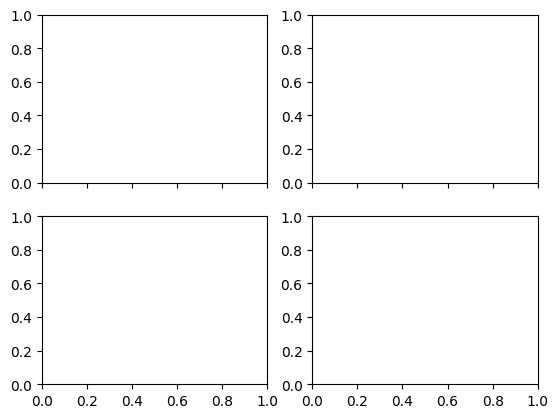

In [ ]:
 # you don't want to worry about this section - only that it needs the variables
###################################################### VISUALIZATION ################################################
       
fig, axs = plt.subplots(2,2,sharex=True)
fig.suptitle('Green DS Master - Decision Support tool for irrigation needs. Current weather & soil retrieved from open-meteo.com\n'+
             'Irrigation criteria: pF > ' + str(inpFCritical) + ", VPD > " + str(invpd_treshold)+ ", no rain next day that allows pF < " + str(inpFCritical) + "\n"+
             "Next irrigation event for early rooting (3-9cm):" + str(plan_3_9_dates[0]) + "\n"+
             "Next irrigation event for established roots (9-27cm):" + str(plan_9_27_dates[0]) )
fig.set_size_inches(12,5)
axs[0,0].set_title('Temperature / VPD')
axs[0,0].plot(dates, temp, color='orange', label='Temp')
axs[0,0].set_ylabel('Celsius', color='orange')
secax_0_0 = axs[0,0].twinx()  # instantiate a second axes that shares the same x-axis
secax_0_0.plot(dates, vpd, color='blue')
secax_0_0.set_ylabel('VPD (kPa)', color='blue')
secax_0_0.fill_between(dates, vpd, invpd_treshold,  where=(np.array(vpd) >= np.array([invpd_treshold] * len(vpd))),
                 alpha=0.30, color='blue', label='VPD > '+str(invpd_treshold))
axs[0,0].legend(loc='upper left', frameon=False)

axs[0,1].set_title('EvapoTranspiration/Rain/Rel Hum')
axs[0,1].plot(dates, ETo, color='red',label='ETo')
axs[0,1].bar(dates, precipitation, color='blue',label='Rain')
axs[0,1].set_ylabel('ETo,Rain (mm)', color='black')
axs[0,1].legend(loc='upper right', frameon=False)
secax_0_1 = axs[0,1].twinx()  # instantiate a second axes that shares the same x-axis
secax_0_1.plot(dates, rh, color='magenta',label='RH')
secax_0_1.set_ylabel('Rel Hum (%)', color='magenta')
secax_0_1.legend(loc='upper right', frameon=False)

axs[1,0].set_title('Soil Moisture 3 to  9cm')
axs[1,0].plot(dates, SoilMoisture_3_9 , color='black', label='Soil moisture (3-9)')
secax_1_0 = axs[1,0].twinx()  # instantiate a second axes that shares the same x-axis
secax_1_0.plot(dates, pF_3_9, color='orange',label='pF')
secax_1_0.bar(dates, [x * inpFCritical for x in plan_3_9], color='red',label='Next irrigation', linewidth=3)
secax_1_0.set_ylabel('pF log(-h)', color='orange')
secax_1_0.tick_params(axis='y', colors='orange')
secax_1_0.plot(dates, [inpFCritical] * len(dates), color='orange',label='Critical pF', linestyle='dashed')
secax_1_0.set_ylim([min(pF_3_9)*0.97, max(pF_3_9)*1.03]) # just for scale purposes
axs[1,0].set_ylabel('% vol', color='black')
axs[1,0].legend(loc='upper right', frameon=False)



axs[1,1].set_title('Soil Moisture, 9 to 27 cm')
axs[1,1].plot(dates, SoilMoisture_9_27, color='black', label='Soil moisture (9-27)')
axs[1,1].set_ylabel('% / % ', color='black')
axs[1,1].legend(loc='upper right', frameon=False)
secax_1_1 = axs[1,1].twinx()  # instantiate a second axes that shares the same x-axis
secax_1_1 .plot(dates, pF_9_27, color='orange',label='pF')
secax_1_1.set_ylabel('pF log(-h)', color='orange')
secax_1_1 .plot(dates, [inpFCritical] * len(dates), color='orange',label='Critical pF', linestyle='dashed')
secax_1_1.bar(dates, [x * inpFCritical for x in plan_9_27] , color='red',label='Next irrigation', linewidth=3)
secax_1_1.set_ylim([min(pF_9_27)*0.97, max(pF_9_27)*1.03]) # just for scale purposes

secax_1_1.legend(loc='upper left', frameon=False)

axs[1,0].tick_params(axis='x', labelrotation=60)
axs[1,0].xaxis.set_major_locator(MultipleLocator(12))
axs[1,0].set_xlabel('DayHour')
axs[1,1].tick_params(axis='x', labelrotation=60)
axs[1,1].xaxis.set_major_locator(MultipleLocator(12))
axs[1,1].set_xlabel('DayHour')

# adding Label to the y-axis
#plt.autoscale(enable=True, axis='both', tight=True)
plt.tight_layout()
# adding legend to the curves
plt.legend()
plt.show()